## Handwritten digit recognition

In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 734.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 671.1 kB/s eta 0:00:001m740.9 kB/s eta 0:00:01
  Using cached protobuf-3.19.6-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 732.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.3/183.3 kB 711.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 764.3 kB/s eta 0:00:001m757.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 714.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Using cached rsa-4.9-py3-none-any.whl (34 kB)


In [5]:
import tensorflow as tf

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2905 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1439 - accuracy: 0.9562
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1047 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0874 - accuracy: 0.9733
Epoch 5/5
313/313 [==============================] - 0s 803us/step - loss: 0.0726 - accuracy: 0.9794
Test Accuracy: 0.9793999791145325
313/313 [==============================] - 0s 438us/step


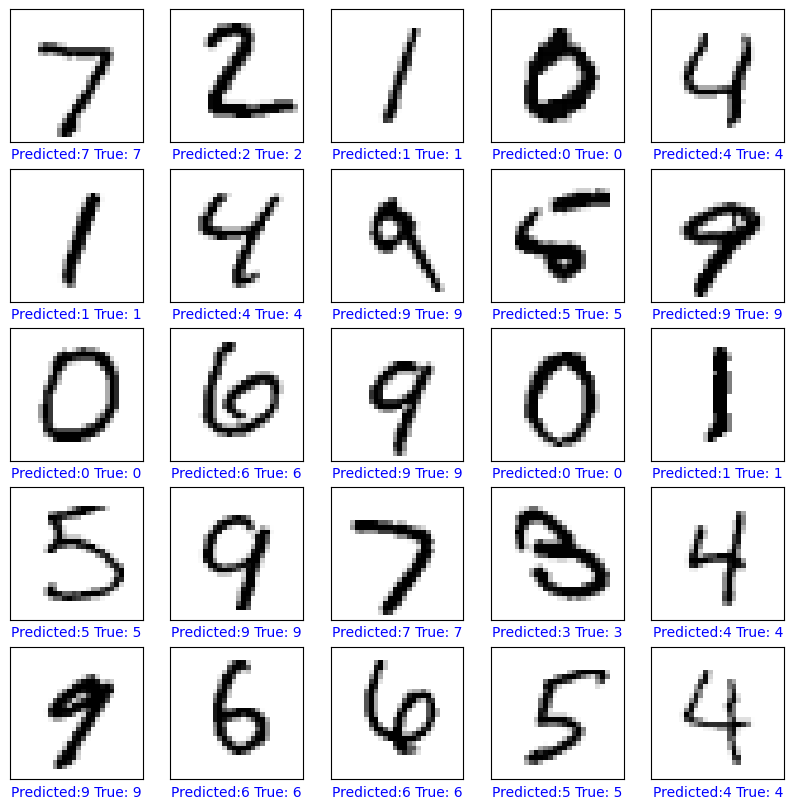

In [10]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

#load and preprocess the MNIST dataset
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#one-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#build the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model
model.fit(train_images,train_labels, epochs=5)

#evaluate the model on the test set

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

#make predictions on some test images
predictions = model.predict(test_images)

#display the first few test images and their predicted labels
plt.figure(figsize=(10,10))
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(' ')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = predictions[i].argmax()
    true_label = test_labels[i].argmax()
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f'Predicted:{predicted_label} True: {true_label}',color=color)
plt.show()